In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bill1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
df  = pd.read_csv('bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df.info

<bound method DataFrame.info of                                                    text    labels
0     Ad sales boost Time Warner profit\n\nQuarterly...  business
1     Dollar gains on Greenspan speech\n\nThe dollar...  business
2     Yukos unit buyer faces loan claim\n\nThe owner...  business
3     High fuel prices hit BA's profits\n\nBritish A...  business
4     Pernod takeover talk lifts Domecq\n\nShares in...  business
...                                                 ...       ...
2220  BT program to beat dialler scams\n\nBT is intr...      tech
2221  Spam e-mails tempt net shoppers\n\nComputer us...      tech
2222  Be careful how you code\n\nA new European dire...      tech
2223  US cyber security chief resigns\n\nThe man mak...      tech
2224  Losing yourself in online gaming\n\nOnline rol...      tech

[2225 rows x 2 columns]>

In [5]:
inputs = df['text']
labels = df['labels']

<AxesSubplot:>

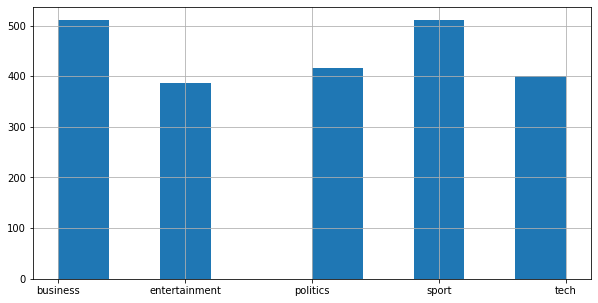

In [7]:
labels.hist(figsize=(10,5))

In [6]:
inputs_train, inputs_test, y_train, y_test = train_test_split(
    inputs, labels, random_state=123
)

In [7]:
inputs_train

1137    Whitehall shredding increasing - Tories\n\nCiv...
1394    Greek duo cleared in doping case\n\nSprinters ...
800     U2 stars enter rock Hall of Fame\n\nSinger Bru...
2138    Warning over tsunami aid website\n\nNet users ...
1535    Benitez delight after crucial win\n\nLiverpool...
                              ...                        
1147    Blair 'said he would stand down'\n\nTony Blair...
2154    IBM puts cash behind Linux push\n\nIBM is spen...
1766    Hingis hints at playing comeback\n\nMartina Hi...
1122    Clarke faces ID cards rebellion\n\nCharles Cla...
1346    Athens memories soar above lows\n\nWell, it's ...
Name: text, Length: 1668, dtype: object

In [9]:
vectorizer = CountVectorizer()

Convert text to numbers

In [12]:
X_train = vectorizer.fit_transform(inputs_train) # 會計算
X_test = vectorizer.transform(inputs_test) # 不會計算
# training data represent what we have when we build our model
# testing data represent what we have when we apply our model to data we haven't seen before

In [11]:
X_train

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [13]:
# 計算非零項數, return True/Flase(1/0) 然後加總
(X_train != 0).sum()

337411

In [15]:
(X_train != 0).sum() /np.prod(X_train.shape)
# X_train.shape returns a tuple containing numbers of rows and numbers of colums
# np.prod times the rows and the columns
# 此行計算非零項在所有項目中佔的比例

0.007695239935415004

In [16]:
model = MultinomialNB()
model.fit(X_train,y_train)
print('train score : ', model.score(X_train, y_train))
print('test score : ', model.score(X_test, y_test))

train score :  0.9922062350119905
test score :  0.9712746858168761


In [34]:
# with stop words
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train,y_train)
print('train score :', model.score(X_train, y_train))
print('test score :', model.score(X_test, y_test))

train score : 0.9928057553956835
test score : 0.9766606822262118


In [35]:
X_train

<1668x25995 sparse matrix of type '<class 'numpy.int64'>'
	with 242123 stored elements in Compressed Sparse Row format>

In [21]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Function doing tokenizing and lemmatizing
    Create a Object and able to call it as if it were a function
    We are able to do that by defining a  __call__ function

In [36]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer() # Create a WordNetLemmatizer Object
    def __call__(self, doc):
        tokens = word_tokenize(doc) # Convert documents into tokens ~= .split()
        word_and_tages = nltk.pos_tag(tokens) # return a list containing tuple which contains (word,tag)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag))\
                for word,tag in word_and_tages] # loop threw each word and tag pair
                                                # return a list contains each lemmatize word in the document

In [37]:
# With self defined lemmatization functions
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print('train score :', model.score(X_train, y_train))
print('test score :', model.score(X_test, y_test))

train score : 0.9922062350119905
test score : 0.9676840215439856


In [38]:
X_train

<1668x26000 sparse matrix of type '<class 'numpy.int64'>'
	with 327738 stored elements in Compressed Sparse Row format>

Using Stemming

In [39]:
class StemTokenizer:
    def __init__(self) :
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [40]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print('train score :', model.score(X_train, y_train))
print('test score :', model.score(X_test, y_test))

train score : 0.9892086330935251
test score : 0.9694793536804309


In [41]:
X_train

<1668x22828 sparse matrix of type '<class 'numpy.int64'>'
	with 335081 stored elements in Compressed Sparse Row format>

with .split() 

In [42]:
def simple_tokenizer(s):
    return s.split()

In [43]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, y_train)
print('train score :', model.score(X_train, y_train))
print('test score :', model.score(X_test, y_test))

train score : 0.9952038369304557
test score : 0.9712746858168761


In [44]:
X_train

<1668x52144 sparse matrix of type '<class 'numpy.int64'>'
	with 369097 stored elements in Compressed Sparse Row format>

vector dimensionality
    default : 1668x26287
              337411 stored elements
    with english stop words : 1668x25995
              242123 stored elements
    with Lemmitization : 1668x26000
              327738 stored elements
    with Stemminization : 1668x22828
              335081 stored elements
    with split() : 1668x52144
              369097 stored elements